# Ranking  the Features of  Smartphone

### Dataset information

* battery_power - Total energy a battery can store in one time measured in mAh
* blue - Has bluetooth (1) or not (0)
* clock_speed - speed at which microprocessor executes instructions
* dual_sim - Has dual sim support (1) or not (0)
* fc - Front Camera mega pixels
* four_g - Has 4G (1) or not (0)
* int_memory - Internal Memory in Gigabytes
* m_dep - Mobile Depth in cm
* mobile_wt - Weight of mobile phone
* n_cores - Number of cores of processor
* pc - Primary Camera mega pixels
* px_height - Pixel Resolution Height
* px_width - Pixel Resolution Width
* ram - Random Access Memory in Mega Bytes
* sc_h - Screen Height of mobile in cm
* sc_w - Screen Width of mobile in cm
* talk_time - longest time that a single battery charge will last 
* three_g - Has 3G (1) or not (0)
* touch_screen - Has touch screen (1) or not (0)
* wifi - Has wifi (1) or not (0)
* price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the dataset
data=pd.read_csv(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\tcs_project-main\MobileTrain.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Descriptive Statistics

In [3]:
data.shape

(2000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#statistical description
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#datatypes of each column
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
#unique values in each column
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [8]:
#missing value handling
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values

In [9]:
#duplicate handling
data.duplicated().sum()

0

There are no duplicated values

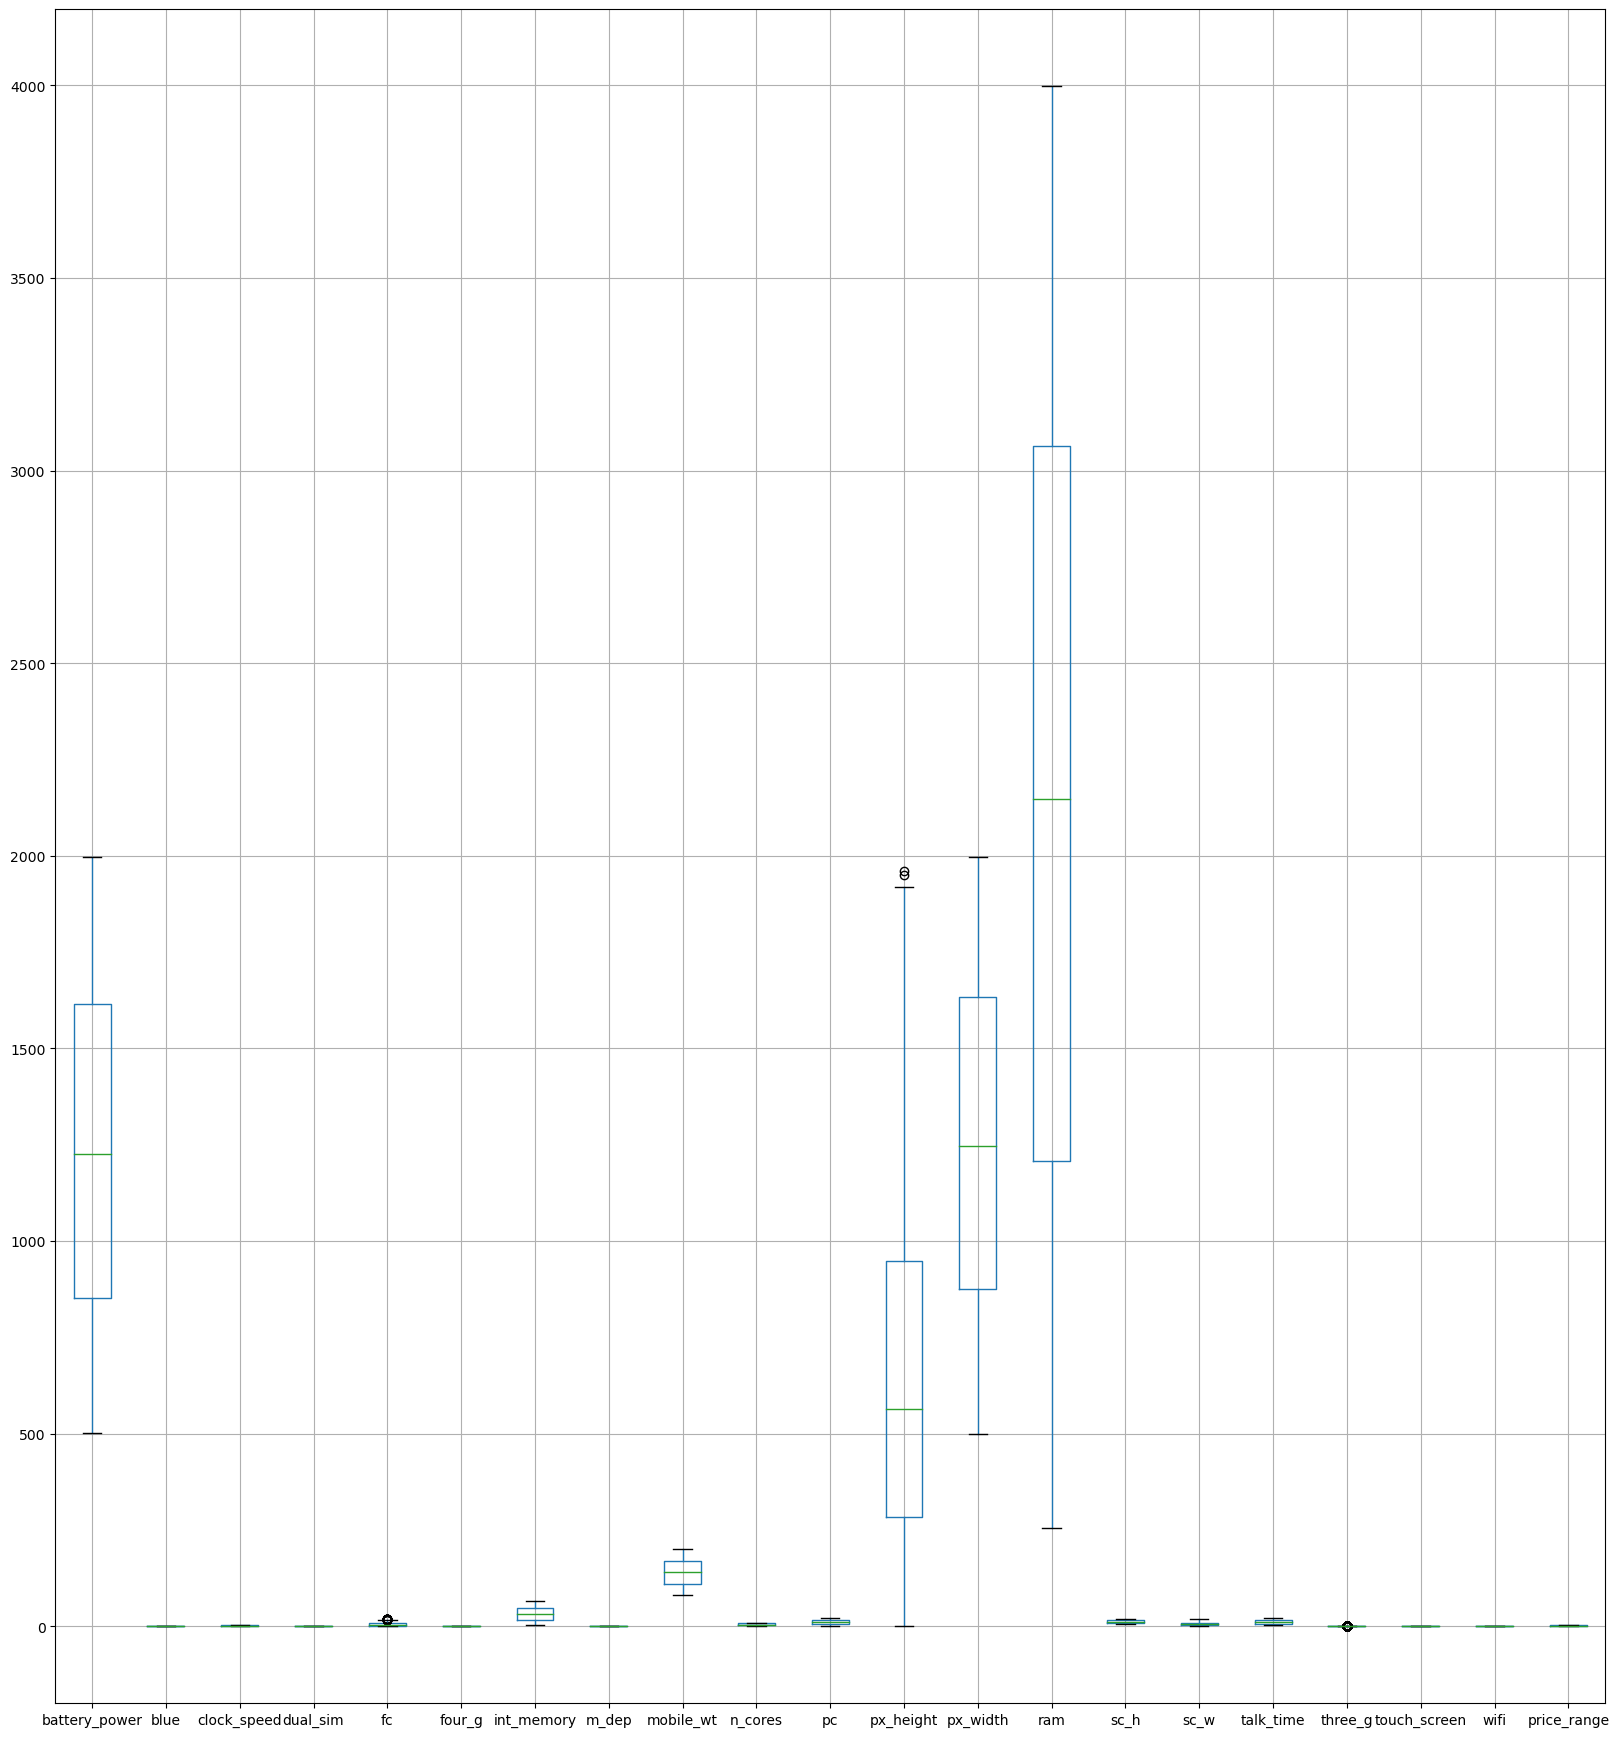

In [10]:
# Outlier detection
data.boxplot(figsize=(20,22))
plt.show()

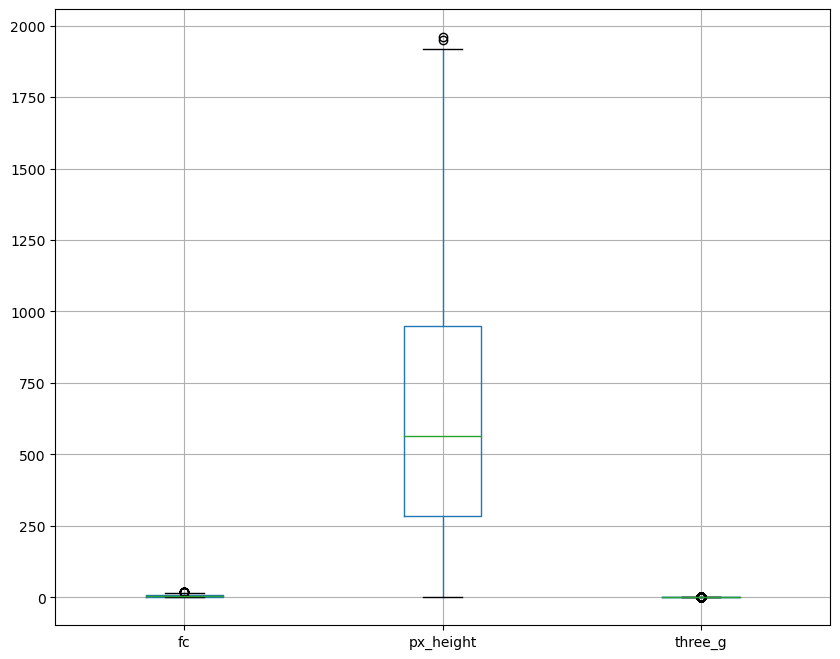

In [11]:
data.boxplot(column=['fc','px_height','three_g'],figsize=(10,8))
plt.show()

In [12]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
data['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

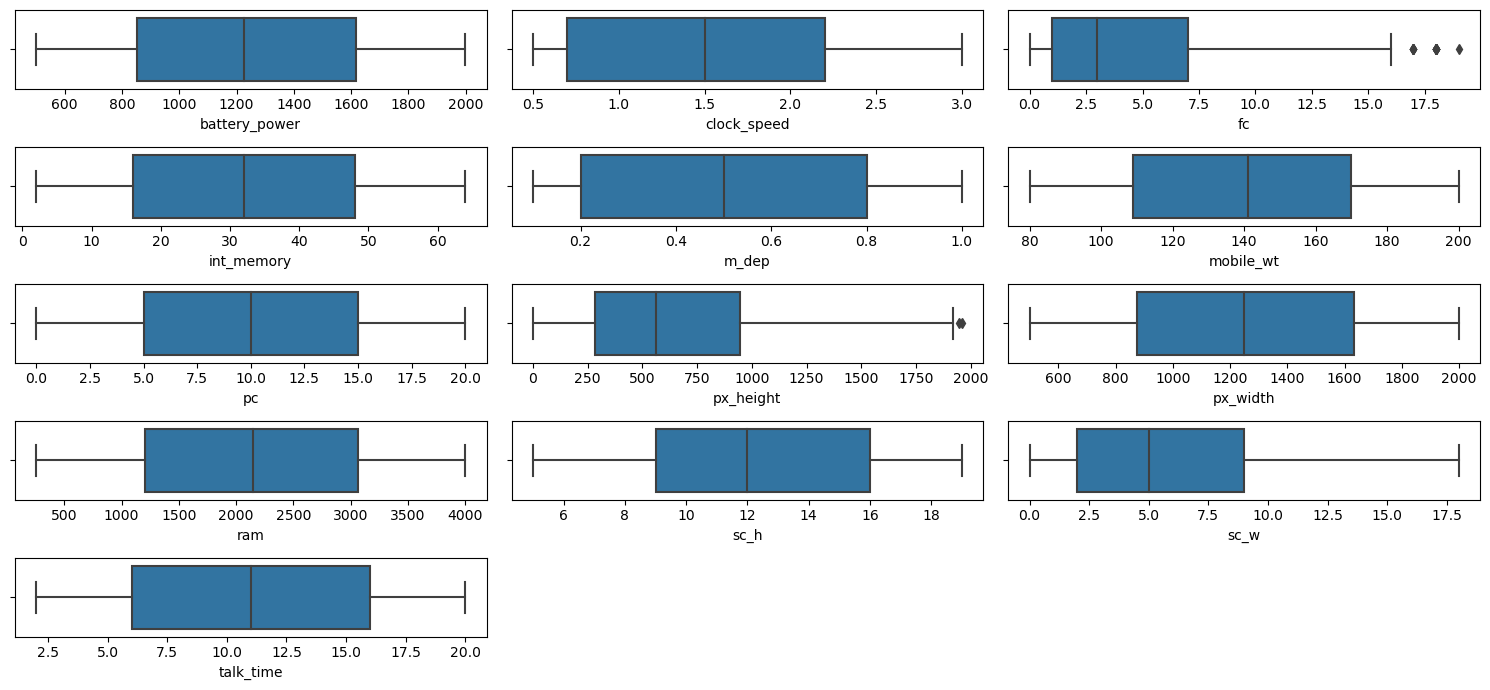

In [14]:
num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(15, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[num_col[i]],orient='v')
    plt.tight_layout()

There are outliers in the columns 'fc', 'three_g' and 'px_height'. Since these are genuine values we need not replace or remove it.

## Exploratory Data Analysis

In [15]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [16]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [17]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

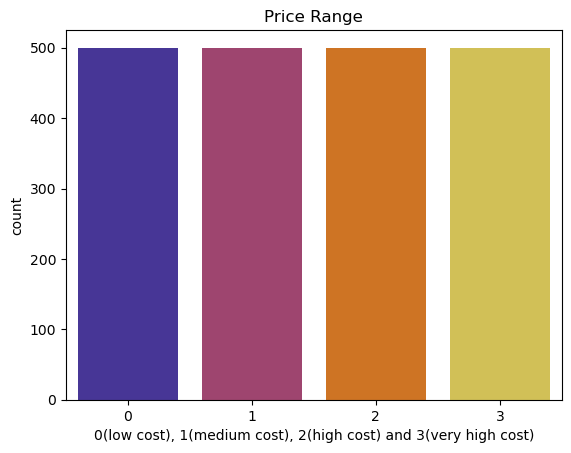

In [18]:
sns.countplot(x='price_range',data=data, palette='CMRmap')
plt.title("Price Range")
plt.xlabel('0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)')
plt.show() 

- The dataset is balanced

In [19]:
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

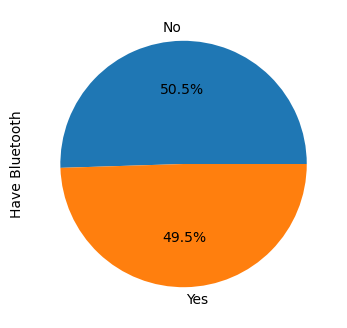

In [20]:
labels=['No','Yes']
plt.figure(figsize=(5,5))
data['blue'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have Bluetooth')
plt.show()

In [21]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

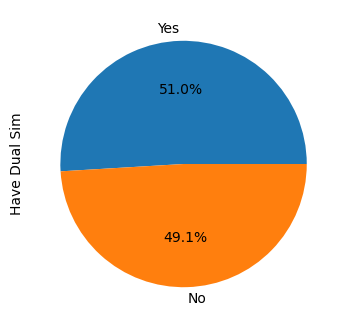

In [22]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
data['dual_sim'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have Dual Sim')
plt.show()

In [23]:
data['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

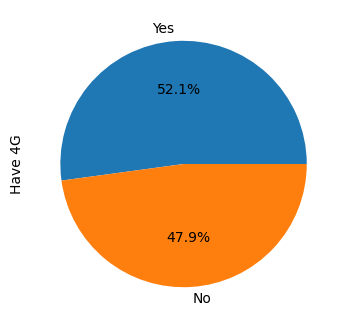

In [24]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
data['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have 4G')
plt.show()

In [25]:
data['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

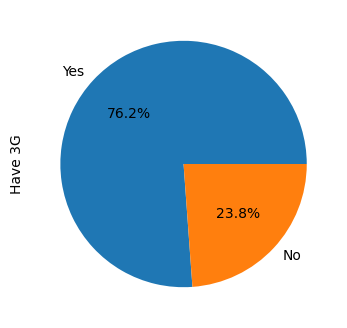

In [26]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
data['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have 3G')
plt.show()

In [27]:
data['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

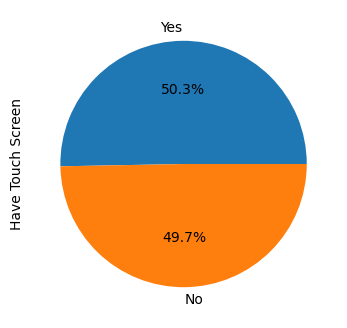

In [28]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
data['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have Touch Screen')
plt.show()

In [29]:
data['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

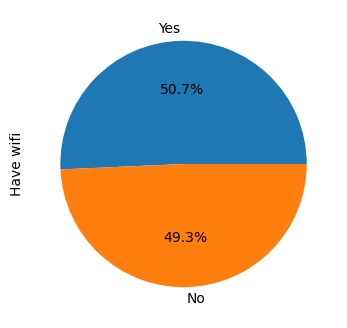

In [30]:
labels=['Yes','No']
plt.figure(figsize=(5,5))
data['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',labels=labels,figsize=(4,4))
plt.ylabel('Have wifi')
plt.show()

In [31]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

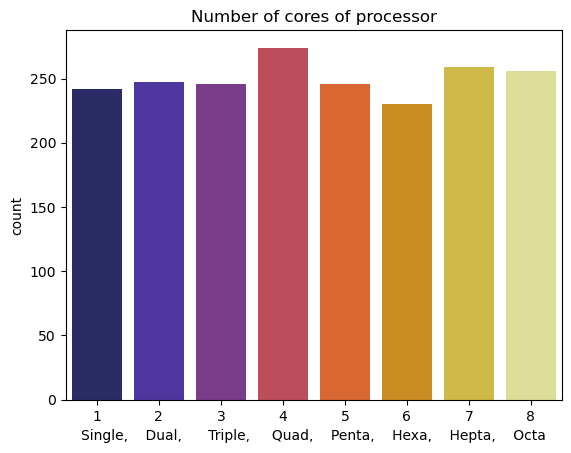

In [32]:
sns.countplot(x='n_cores',data=data, palette='CMRmap')
plt.title("Number of cores of processor")
plt.xlabel('Single,    Dual,      Triple,     Quad,    Penta,    Hexa,    Hepta,    Octa')
plt.show() 

* We can see that almost half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi.
* Almost three-fourth of the phones have 3G.
* The different types of cores are also spread out almost evenly.

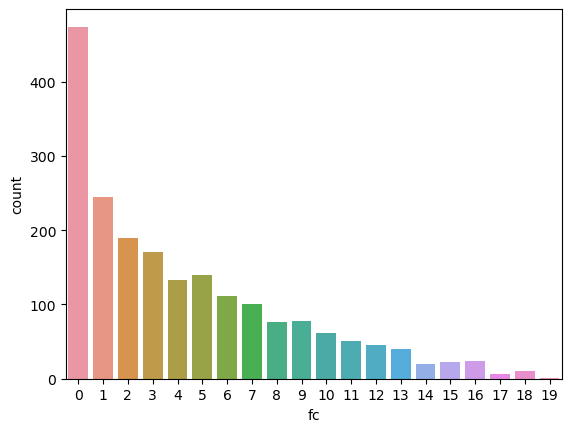

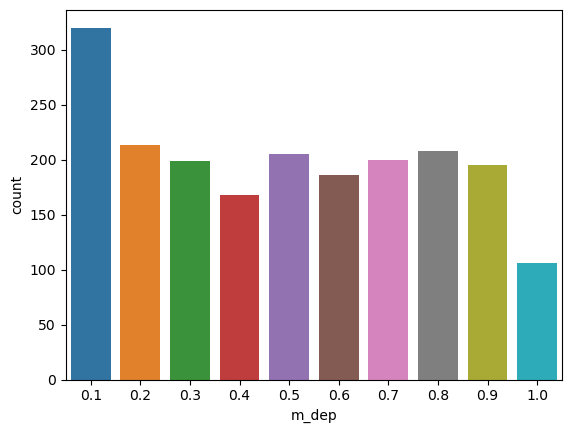

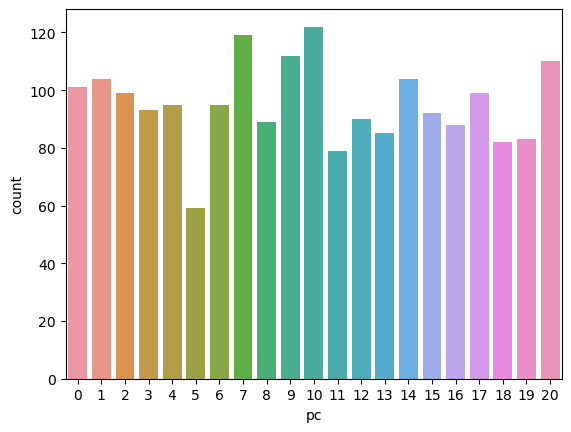

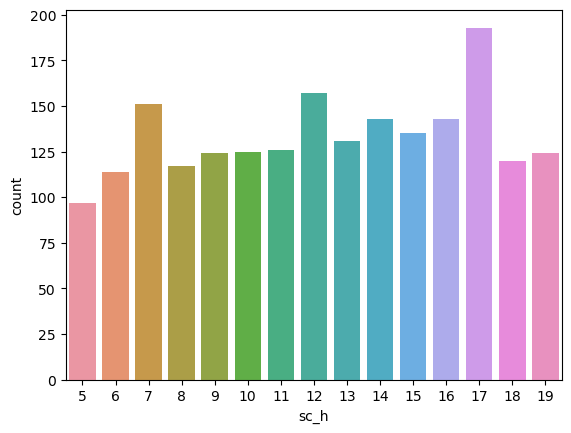

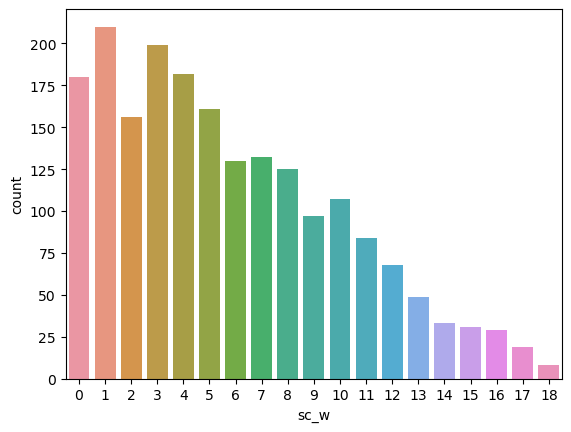

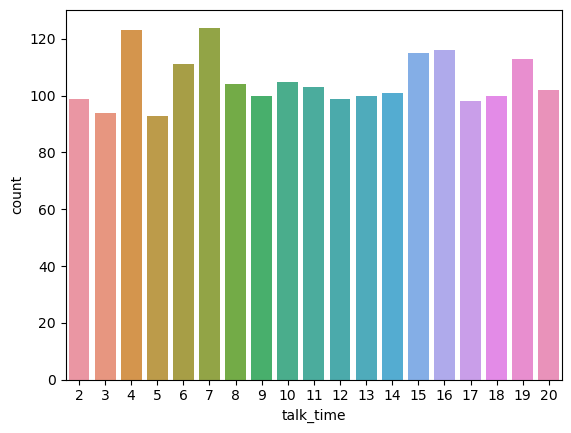

In [33]:
 #CountPlot for various columns
for i in num_col:
    if (data[i].nunique())<=25:
        sns.countplot(x=data[i])
        plt.show()

* Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset doesn't have front camera.
* Almost 6 % of phones in this dataset doens't have camera.
* Talktime is evenly spread out.

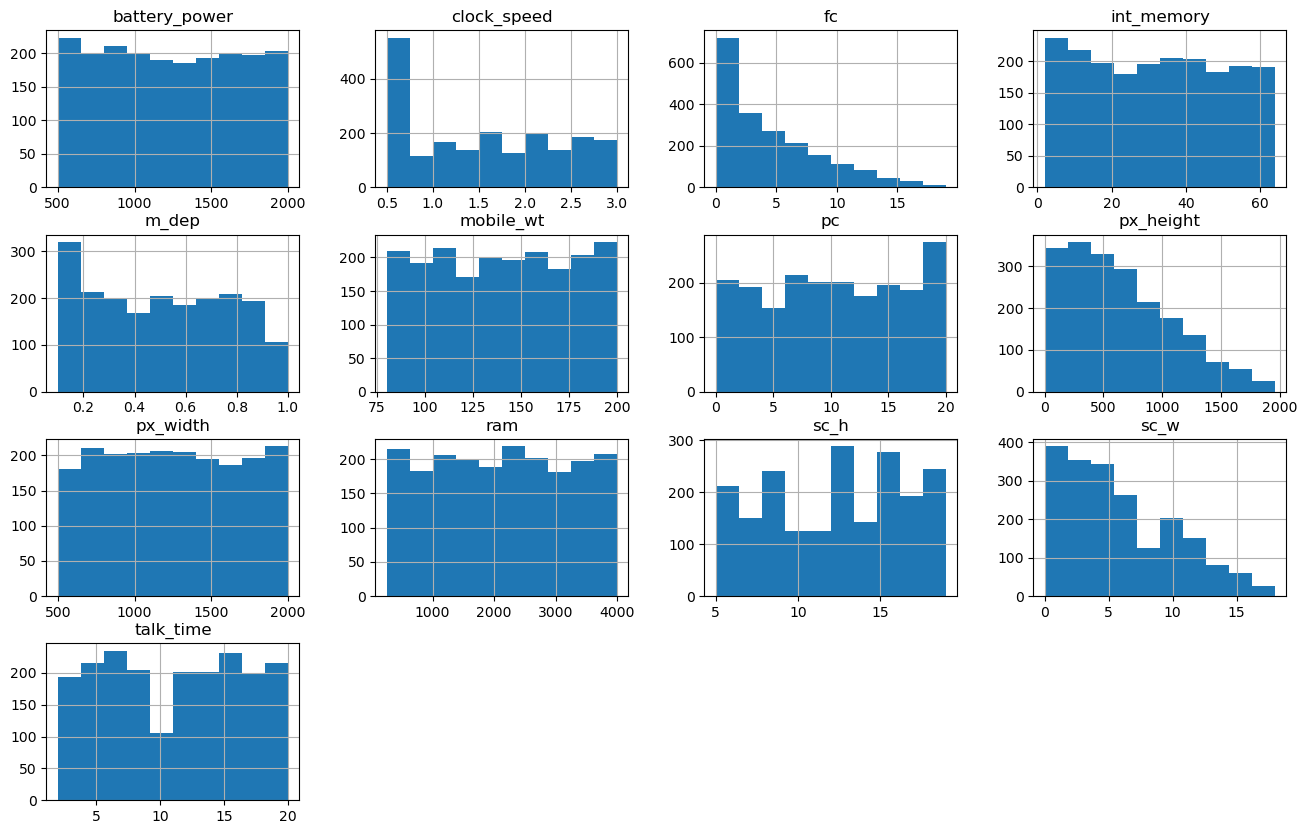

In [34]:
data.hist(num_col,figsize=(16,10))
plt.show()

* fc has exponential distribution
* the pixel height distribution is right skewed.
* others have multimodal distribution.

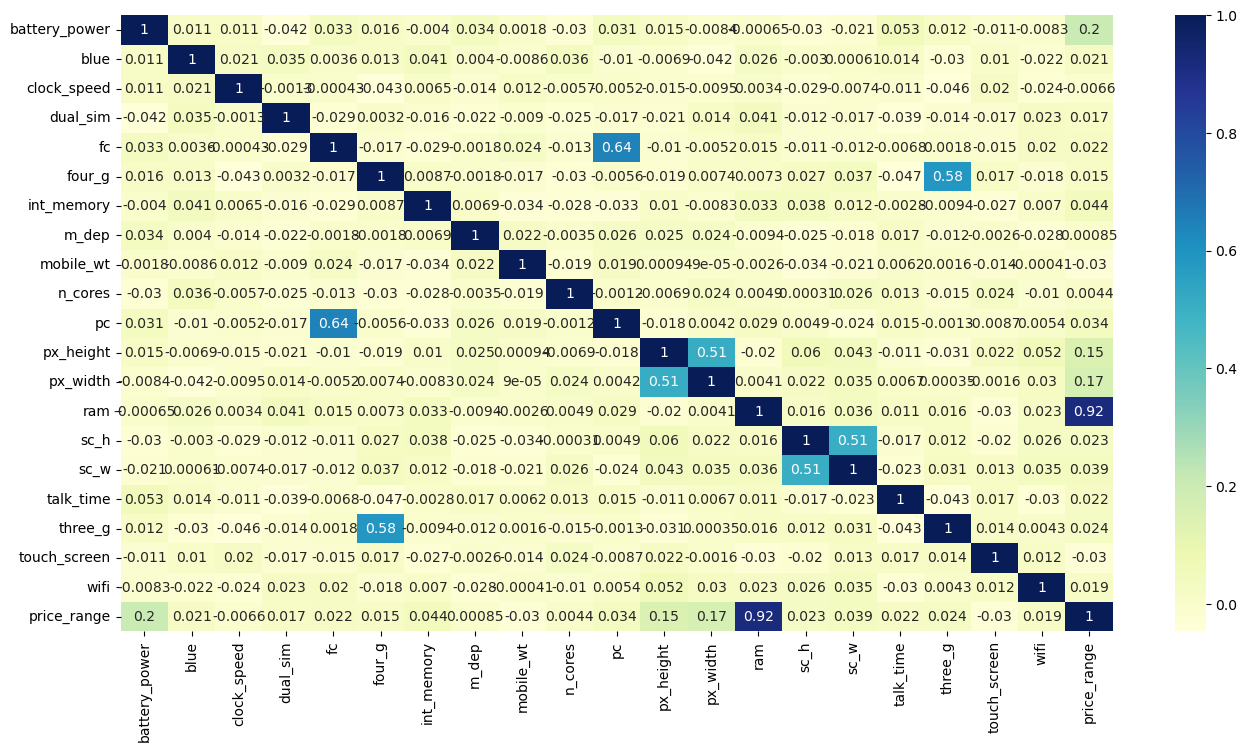

In [35]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

* Almost all features exhibit low correlation with each other.
* 'ram' is highly correlated with price range.
* None of the features are negatively correlated.

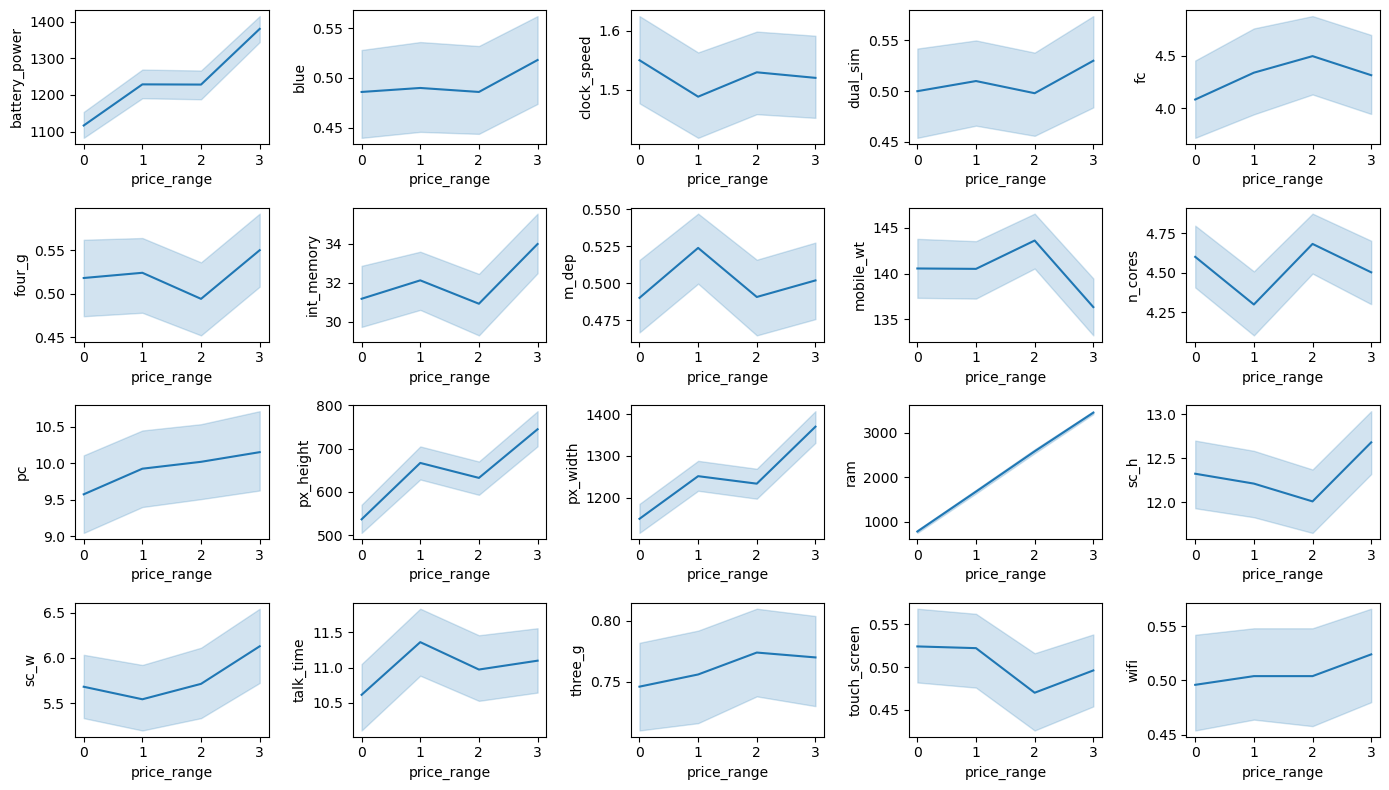

In [36]:
a=data.drop('price_range',axis=1)
plt.figure(figsize=(14,8))
for i, j in enumerate(a):
    plt.subplot(4,5, i+1)
    sns.lineplot(y=data[j],x=data["price_range"])
plt.tight_layout()

* The higher the price range higher the average ram size.
* We can see that the higher the price range it tend to have a higher battery power except on the price range 1 to 2. It seems that from price range 1 to 2 there's no significance difference in the average  battery power 
* Clock speed is highest for mobiles in lower price range.
* The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
* It seems that talk time doesn't really affect the price range.
* Higher price range has a higher megapixel primary camera.

## Major Findings:

* All columns are numerical.
* We can see that almost half of the phones have bluetooth, dual sim, 4G, touchscreen and wifi.
* The different types of cores are also spread out almost evenly.
* Almost three-fourth of the phones have 3G.
* Almost 6 % of phones in this dataset doens't have camera.
* Majority of phones in this dataset have a front camera. Only a quarter of the phone in this dataset doesn't have front camera.
* Talktime is evenly spread out.
* fc has exponential distribution
* The pixel height distribution is right skewed.
* Others have multimodal distribution.
* Darker shades represent low correlation
* All features exibit low correlation with each other.
* 'ram' is highly correlated with price range.
* None of the features are negatively correlated.

In [37]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [38]:
data.shape

(2000, 21)

## Dataset into Hardwares and Softwares

In [39]:
# Column names
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [40]:
# Defining features into Hardwares and Softwares 
hardwares= data[['battery_power','fc','m_dep','mobile_wt','pc','px_height','px_width','sc_h','sc_w','touch_screen']]
softwares= data[['blue','clock_speed','dual_sim','four_g','int_memory','n_cores','ram','talk_time','three_g','wifi']]

In [41]:
# Hardware features
hardwares.head()

,battery_power,fc,m_dep,mobile_wt,pc,px_height,px_width,sc_h,sc_w,touch_screen
0,842,1,0.6,188,2,20,756,9,7,0
1,1021,0,0.7,136,6,905,1988,17,3,1
2,563,2,0.9,145,6,1263,1716,11,2,1
3,615,0,0.8,131,9,1216,1786,16,8,0
4,1821,13,0.6,141,14,1208,1212,8,2,1


In [42]:
# Software features
softwares.head()

,blue,clock_speed,dual_sim,four_g,int_memory,n_cores,ram,talk_time,three_g,wifi
0,0,2.2,0,0,7,2,2549,19,0,1
1,1,0.5,1,1,53,3,2631,7,1,0
2,1,0.5,1,1,41,5,2603,9,1,0
3,1,2.5,0,0,10,6,2769,11,1,0
4,1,1.2,0,1,44,2,1411,15,1,0


## Splitting Independent and dependent features for feature scalling

In [43]:
# Split the dataset into features and target
x = data.drop('price_range', axis=1)
y = data['price_range']

In [44]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=123, stratify=y)

In [45]:
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1600, 20), (1600,), (400, 20), (400,))

In [46]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1849,1786,0,1.2,0,11,0,61,0.1,123,3,14,74,865,3033,14,11,17,0,1,0
1866,907,1,2.6,1,7,0,44,0.2,160,3,12,144,896,3911,13,6,8,0,0,0
908,1254,0,1.7,0,0,1,45,0.4,146,3,3,1571,1956,606,7,2,2,1,1,1
614,539,1,0.6,1,9,0,21,0.1,145,7,14,551,599,3597,14,5,9,0,0,0
1628,999,0,2.6,1,11,1,56,1.0,165,4,13,342,1641,3083,8,4,11,1,1,1


## Feature Scaling 

- Using Normalization (Min-Max Scaling)

In [47]:
# Import the class standardscaler                               #Normalization
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on train data
x_test.loc[:,:] = scaler.transform(x_test)

In [48]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1849,0.858383,0.0,0.28,0.0,0.578947,0.0,0.951613,0.000000,0.358333,0.285714,0.70,0.037755,0.243984,0.742513,0.642857,0.611111,0.833333,0.0,1.0,0.0
1866,0.271209,1.0,0.84,1.0,0.368421,0.0,0.677419,0.111111,0.666667,0.285714,0.60,0.073469,0.264706,0.977273,0.571429,0.333333,0.333333,0.0,0.0,0.0
908,0.503006,0.0,0.48,0.0,0.000000,1.0,0.693548,0.333333,0.550000,0.285714,0.15,0.801531,0.973262,0.093583,0.142857,0.111111,0.000000,1.0,1.0,1.0
614,0.025384,1.0,0.04,1.0,0.473684,0.0,0.306452,0.000000,0.541667,0.857143,0.70,0.281122,0.066176,0.893316,0.642857,0.277778,0.388889,0.0,0.0,0.0
1628,0.332665,0.0,0.84,1.0,0.578947,1.0,0.870968,1.000000,0.708333,0.428571,0.65,0.174490,0.762701,0.755882,0.214286,0.222222,0.500000,1.0,1.0,1.0


In [49]:
x_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1216,0.438878,0.0,0.08,1.0,0.052632,1.0,0.435484,0.666667,0.358333,0.142857,1.00,0.158673,0.866310,0.343850,0.857143,0.500000,0.722222,1.0,0.0,1.0
768,0.432866,1.0,0.68,0.0,0.210526,0.0,0.451613,0.111111,0.216667,0.714286,0.25,0.825000,0.785428,0.935561,0.857143,0.777778,0.333333,1.0,0.0,0.0
817,0.278557,0.0,0.16,1.0,0.052632,0.0,0.096774,0.000000,0.358333,0.857143,0.25,0.333163,0.114305,0.373262,0.857143,0.222222,0.666667,1.0,1.0,0.0
1578,0.905144,0.0,0.00,1.0,0.000000,1.0,0.354839,0.000000,0.625000,0.571429,0.05,0.141327,0.437834,0.480214,0.857143,0.333333,0.444444,1.0,1.0,0.0
862,0.376754,1.0,0.00,0.0,0.000000,1.0,0.193548,0.666667,0.075000,0.142857,0.10,0.095918,0.286096,0.754545,0.357143,0.055556,0.888889,1.0,0.0,1.0


# Model Building and Evaluation

## 1. Desicion Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report

print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.7275


In [52]:
import sklearn.metrics as metrics
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

72.75173762379924

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       100
           1       0.57      0.84      0.68       100
           2       0.71      0.52      0.60       100
           3       0.85      0.84      0.84       100

    accuracy                           0.73       400
   macro avg       0.75      0.73      0.73       400
weighted avg       0.75      0.73      0.73       400



## 2. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [55]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.87


In [56]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

87.04073308313231

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       100
           1       0.79      0.84      0.82       100
           2       0.82      0.80      0.81       100
           3       0.97      0.89      0.93       100

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



## 3.Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
# Define the gradient boosting classifier model
gb = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model=gb.fit(x_train, y_train)
y_pred=gb_model.predict(x_test)

In [59]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.8775


In [60]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

87.7220927562373

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.86      0.81      0.84       100
           2       0.83      0.86      0.84       100
           3       0.94      0.89      0.91       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



## 4. XG Boost Classifier

In [62]:
import xgboost as xgb

# define the XGBoost model
model = xgb.XGBClassifier()
# train the model on the training data
xgb_model=model.fit(x_train, y_train)
# make predictions on the testing data
y_pred = xgb_model.predict(x_test)

In [63]:
# evaluate the accuracy of the model
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.905


In [64]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

90.46921223087027

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       0.93      0.83      0.88       100
           2       0.84      0.92      0.88       100
           3       0.96      0.89      0.92       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.90       400



## Choosing Best Model

<Axes: xlabel='model', ylabel='accuracy'>

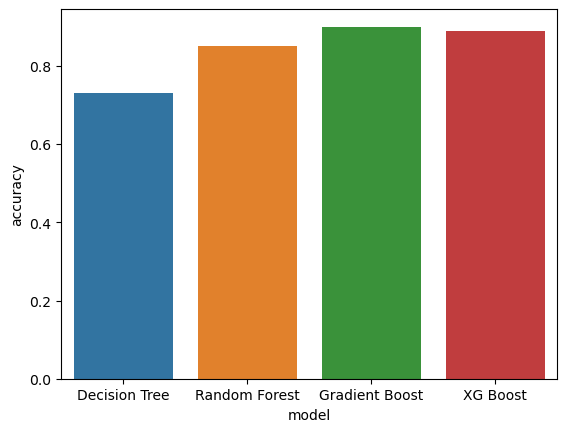

In [66]:
classifiers=["Decision Tree","Random Forest",'Gradient Boost','XG Boost']
accuracy = [0.73,0.85,0.90,0.89]
f1_score = [72.9,85.8,90.8,89.75]
df_af=pd.DataFrame({'model':classifiers,"accuracy":accuracy,"f1-score":f1_score})
sns.barplot(data=df_af,x="model",y="accuracy")

<Axes: xlabel='model', ylabel='f1-score'>

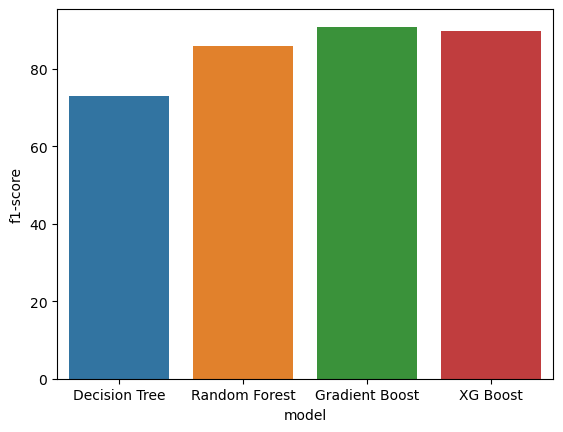

In [67]:
sns.barplot(data=df_af,x="model",y="f1-score")

#### Gradient Boost Classifier is the best model.

- We need to identify the most important features and rank the features based on their importance scores.

- We could Identify the most important features using feature selection techniques such as correlation analysis, mutual information, and feature importance scores from machine learning models.

### Creating pickle file for Model Deployment

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score

In [69]:
data_test = pd.read_csv(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\tcs_project-main\MobileTest.csv')
data_train = pd.read_csv(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\tcs_project-main\MobileTrain.csv')

In [70]:
data_train["rank_by_price"]=data_train["price_range"].rank()
data1=data_train
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [71]:
data1.sort_values(by=["rank_by_price"])


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [72]:
RankedData = data1.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [73]:
r= data1
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [74]:
data=pd.read_csv(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\tcs_project-main\MobileTrain.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [75]:
x= data.drop('price_range',axis=1)
y=data['price_range']

In [76]:
x= data.drop('price_range',axis=1)
y=data['price_range']

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [78]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [79]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)


In [80]:
coefficients = logit_model.coef_

avg_importance =np.mean(np.abs(coefficients),axis=0)
log_feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': avg_importance})
log_feature_importance = log_feature_importance.sort_values('Importance', ascending=True)
log_feature_importance .sort_values(by=['Importance'],ascending=False,inplace=True)
log_feature_importance['rank']=log_feature_importance['Importance'].rank(ascending=False)
log_feature_importance

,Feature,Importance,rank
13,ram,7.025661,1.0
0,battery_power,1.827208,2.0
12,px_width,1.064556,3.0
11,px_height,1.045025,4.0
8,mobile_wt,0.247712,5.0
6,int_memory,0.157956,6.0
19,wifi,0.127821,7.0
9,n_cores,0.119391,8.0
18,touch_screen,0.086816,9.0
7,m_dep,0.084139,10.0


In [81]:
import pickle
#for model
pickle.dump(logit_model,open(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\rank_model.pkl','wb'))

#for_scaler
pickle.dump(scaler,open(r'C:\Users\ANJALI\Desktop\TCS I iON Internship\RIO 125 GITHUB\tcs_project-main\scaling_features.pkl','wb'))